Імпортуємо необхідні пакети

In [1]:
import os
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('ggplot')  # красиві графіки

Місце розташування jupyter notebook

In [2]:
pwd;

'C:\\Users\\Bloom\\Documents\\AnacondaLads'

In [3]:
path = "D:\PROJECTS\LABKI\Lab\Lab1\sample2.csv"

data_file = pd.read_csv(path, header=None)
data_file.head();

Запам'ятовуємо назву стовпця, що відповідає класові даних

In [4]:
class_column = len(data_file.columns) - 1  # індекс останнього стовпця "Клас"
class_column;

Для візуалізації виділяємо унікальні класи даних, для розділення точок на графіку за кольором

In [5]:
data_unique_classes = data_file[class_column].unique()
data_unique_classes;

Підготовка даних

In [6]:
# https://stackoverflow.com/questions/33742588/pandas-split-dataframe-by-column-value
# Розділяємо дані по класах, що зазначені у третьому стовпці (для візуалізації)
def separate_by_unique_class(unique_class):
    return data_file[data_file[class_column] == unique_class]

# розділяє дані на два масиви: масив масивів даних та масив класів. Індекси одного масиву відповідають індексам іншого
# def cut_data_and_classes(data_file):
#     res_data = []
#     res_class = []
#     for index, val in data_file.iterrows():
#         dt, cls = _slice_data_row(val)
#         res_data.append(dt)
#         res_class.append(cls)
#     return res_data, res_class

# def _slice_data_row(row):
#     tmp_lst = list(row)
#     res_data = tmp_lst[:-1]  # слайс даних з масиву
#     res_cls = tmp_lst[-1]  # слайс класу з масиву
    
#     return res_data, res_cls

Функції для візуалізації точок, що розділені за класом

In [7]:
def add_data_to_plot(x, y):
    plt.plot(x, y, 'o')

def add_dots_to_plot(data_f, class_column_index:int, data_uniq_cls:list):
    
    # тільки якщо ми маємо справу із двовимірними даними
    if class_column_index == 2:
        
        # проходимо по всіх унікальних класах 
        for d_cl in data_uniq_cls:
            data = separate_by_unique_class(d_cl)
            
            add_data_to_plot(data[0], data[1]) 
    else:
        pass

Демонстрація графіку з точками

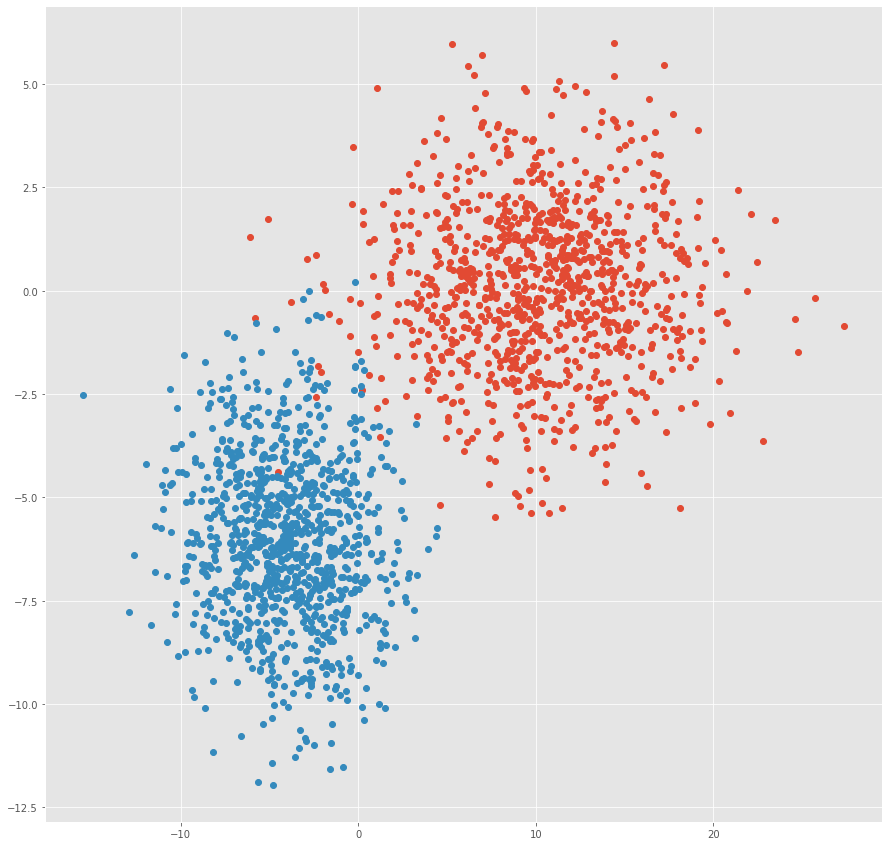

In [8]:
plt.figure(figsize=(15,15)) # налаштовуємо розміри відображення даних 
add_dots_to_plot(data_file, class_column, data_unique_classes)
plt.show()

-------------------------------------------------------------------------

# Нейронна мережа

Критерії зупинки навчання нейронної мережі

In [9]:
epoch_max = 1000
error_max = 0

Параметри налаштування ініціалізації нейронної мережі

In [10]:
data_dim = class_column  # змінна class_column відповідає виміру вхідних даних
weights_start = 0.0
learning_rate = 1.

Тіло нейронної мережі

In [11]:
# Масив представляє синаптичні ваги нейрону.
# Кількість цих ваг рівна кількості вимірів даних для розпізнання + нейрон зміщення
weights = [weights_start for i in range(data_dim + 1)]  # ініціалізуємо ваги для нейронів + нейрон зміщення

Історія навчання нейромережі

In [12]:
history = []  # зберігання вагів, помилки та епохи при кожному зменшенні сумарної похибки відносно попередньої епохи

def _history_line(weights, error, epoch):
    lst = []
    lst.append(weights)
    lst.append(error)
    lst.append(epoch)
    return lst

Методи для навчання нейромережі на наборі даних

In [13]:
# суматор або потенціал активації
def calc_activation_potential(in_data, weight_lst):
    result_sum = 0
    
    for i in range(1, len(weight_lst)):
        result_sum = result_sum + (weight_lst[i] * in_data[i-1])
    
    result_sum = result_sum + weight_lst[0]    
    
    return result_sum

# функція активації
def phi(activ_potent):
    if activ_potent >= 0:
        return 1.0
    else:
        return 0.0
    
# оновлення вагів у процесі навчання
def update_weights(in_weights:list, in_data:list, train_out_sig:int, curr_out_sig):
    upd_weights = []
    upd_weights.append(_calc_weight(in_weights[0], 1.0, train_out_sig, curr_out_sig)) # обрахування нейрона зміщення
    
    for i in range(1, len(in_weights)):
        # індекс масиву даних починається з нуля, а потрібно дані множити на ваги нейронів починаючи з 1
        upd_weights.append(_calc_weight(in_weights[i], in_data[i-1], train_out_sig, curr_out_sig))
    
    return upd_weights
    
def fit(data_data, data_class):
    
    global weights
    global history

    error_train = 0.
    error_current_iter = 0.
    error_prev_iter = 0.
    
    for i in range(1, epoch_max+1):
        error_prev_iter = error_train    
        error_train = 0.
        
        # навчання нейромережі
        for j in range(len(data_data)):
            curr_out_signal = model_predict(weights, data_data[j])
            weights = update_weights(weights, data_data[j], data_class[j], curr_out_signal)
        
        # обрахування сумарної похибки
        for j in range(len(data_data)):
            curr_out_signal = model_predict(weights, data_data[j])
            #-----------------------------------------------------------------        
            error_current_iter = abs(data_class[j] - curr_out_signal)
            error_train = error_train + error_current_iter
        
        if error_train < error_prev_iter:
            history.append(_history_line(weights, error_train, i))
            error_prev_iter = error_train
        
        if error_train <= error_max:
            break
            
def model_predict(weights, in_data):
    activation_potential = calc_activation_potential(
        in_data=in_data,
        weight_lst=weights
                                                     )
    out_signal = phi(activ_potent=activation_potential)
    return out_signal

def _calc_weight(weight, in_data, train_out_sig, curr_out_sig):
    return weight + ((learning_rate * in_data) * (train_out_sig - curr_out_sig))


Процес навчання нейромережі на наборі даних

In [14]:
# data_data, data_classes = cut_data_and_classes(data_file)
# # навчання
# fit(data_data, data_classes)

dataset = data_file.values

# підготовка вхідних даних
# формування вектору навчальних даних
data_data = dataset[:, 0:class_column]
# формування вектору класів
data_classes = dataset[:, -1]

fit(data_data, data_classes)

In [15]:
# пошук елементу масиву 'history' з найменшою похибкою для того, щоб взяти відповідні ваги
error_history = []
for val in history:
    error_history.append(val[-2])
error_min = min(error_history)
error_min_index = error_history.index(error_min)

weights = list(history[error_min_index][0]) # ваги, що відповідають найменшій похибці


# Вивід параметрів

In [16]:
print("Optimal weight were found after {0} epoch, and error was {1}".format(history[error_min_index][-1], error_min))
print("Weights are:\n{0}\n".format(weights))

Optimal weight were found after 58 epoch, and error was 14.0
Weights are:
[21.0, 7.610543751608072, 10.738424649650685]



# Візуалізація результату навчання

In [17]:
def calc_trand_line(x_data:list, weights:list):
    w0 = weights[0]
    w1 = weights[1]
    w2 = weights[2]
    
    x2 = []
    for x1 in x_data:
        val = (-1)*(w1/w2)*x1 - (w0/w2)
        x2.append(val)
    return x2

x1 = [-20,-15, -10, -5, 0, 5, 10, 15, 20, 25, 30]
x2 = list(calc_trand_line(x1, weights))

for i in range(len(x1)):
    print(f"x1 = {x1[i]}   x2 = {x2[i]}")


x1 = -20   x2 = 12.218819735018549
x1 = -15   x2 = 8.675216273659979
x1 = -10   x2 = 5.131612812301408
x1 = -5   x2 = 1.5880093509428381
x1 = 0   x2 = -1.955594110415732
x1 = 5   x2 = -5.499197571774302
x1 = 10   x2 = -9.042801033132871
x1 = 15   x2 = -12.586404494491441
x1 = 20   x2 = -16.13000795585001
x1 = 25   x2 = -19.67361141720858
x1 = 30   x2 = -23.21721487856715


Візуалізуємо розділення класів даних

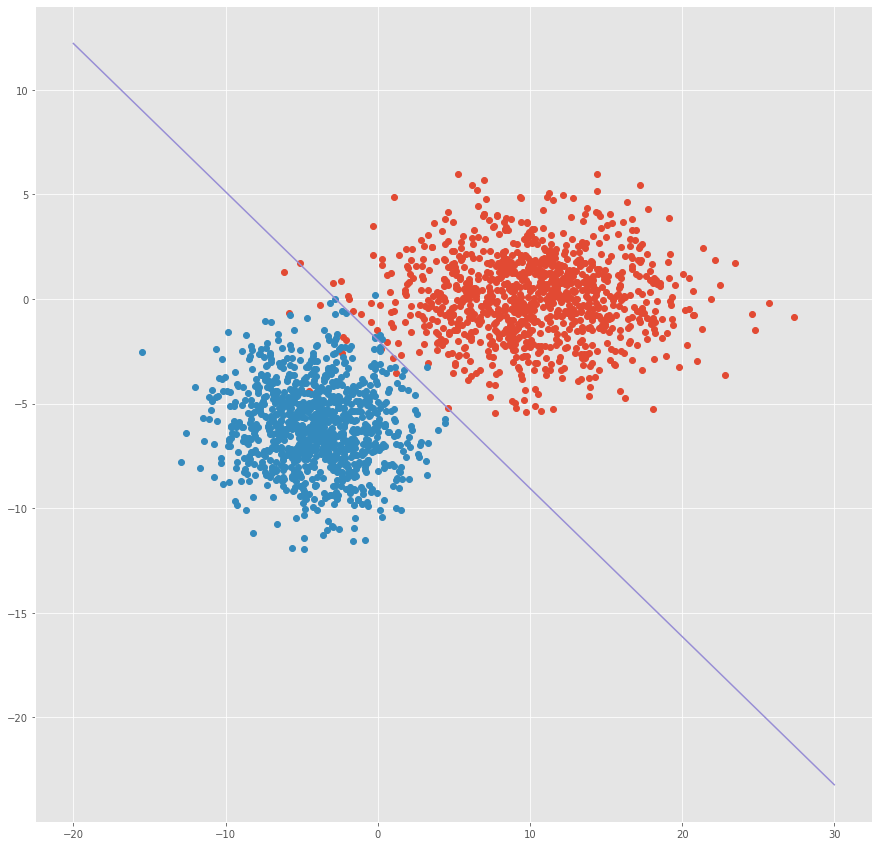

In [18]:
plt.figure(figsize=(15,15)) # налаштовуємо розміри відображення даних 
add_dots_to_plot(data_file, class_column, data_unique_classes)
plt.plot(x1, x2)
plt.show()